# **Kaggle submitted code**

I achieved a ranking of 236 out of 1,457 groups, placing me in the top 16%.So please do consider this code.

I started my deep learning project by importing a range of essential libraries and modules.These imports set the stage for the various data preprocessing and model-building tasks in my project.

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D , BatchNormalization,Lambda,  MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

Later I loaded the dataset from CSV files using the 'pandas' library. The 'train.csv' file,  was read into a DataFrame named 'train_df.' This file typically contains the training data required for model development. Additionally, I imported the 'test.csv' file into a DataFrame named 'test_df,' which is typically used for making predictions or testing the trained model.

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/Digit_recognizer_Dataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Digit_recognizer_Dataset/test.csv')

In [3]:
X_train = train_df.drop(labels = ["label"],axis = 1)
Y_train = train_df["label"]

I began my data preprocessing by conducting data cleaning and quality checks. I ensured that there were no missing values in the 'X_train' DataFrame, and a similar check is performed for the 'test_df' DataFrame. Subsequently for data normalization, the pixel values in 'X_train' and 'test_df' are normalized by dividing each value by 255.0. This process scales the pixel values to a range between 0 and 1.The final stages of data preparation involved reshaping the data. 'X_train' and 'test_df' were transformed into 4D NumPy arrays with dimensions (-1, 28, 28, 1), a common format for image data in deep learning applications. Simultaneously, the target variable 'Y_train' underwent one-hot encoding using the 'to_categorical' function, with 'num_classes' set to 10. These steps collectively represent data cleaning and preprocessing

In [4]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
X_train = X_train / 255.0
test = test_df / 255.0

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [8]:
Y_train = to_categorical(Y_train, num_classes = 10)

And also as a part of my data preprocessing, I divided the training data into two separate sets: 'X_train' and 'Y_train' for model training and 'X_val' and 'Y_val' for model validation. This was achieved using the 'train_test_split' function from Scikit-Learn

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=99)

In [10]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

I chose the Convolutional Neural Network (CNN) model using Keras. This model is constructed sequentially, beginning with a pair of convolutional layers created with model.add(Conv2D(...)).  Following each convolutional layer, max-pooling is applied to reduce spatial dimensions, and batch normalization helps stabilize and accelerate the training process. Dropout layers with a 25% dropout rate are introduced at specific points to prevent overfitting.

The model is compiled with the categorical cross-entropy loss function, the Adam optimizer with a specified learning rate, and accuracy as the evaluation metric. Data augmentation is applied using the ImageDataGenerator to introduce slight transformations in the training data, enhancing model generalization. Additionally, a learning rate scheduler is employed to adjust the learning rate during training.






In [11]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 28, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 28, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation = "softmax"))




In [12]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=1e-3), metrics=["accuracy"])

In [13]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [14]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [15]:
hist = model.fit(datagen.flow(X_train, Y_train, batch_size=64),
                           steps_per_epoch=500,
                           epochs=50, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(X_val[:400,:], Y_val[:400,:]), #For speed
                           callbacks=[annealer])

Epoch 1/50
500/500 - 129s - loss: 0.6076 - accuracy: 0.7958 - val_loss: 0.1727 - val_accuracy: 0.9575 - lr: 0.0010 - 129s/epoch - 259ms/step
Epoch 2/50
500/500 - 127s - loss: 0.1613 - accuracy: 0.9553 - val_loss: 0.0666 - val_accuracy: 0.9825 - lr: 9.0000e-04 - 127s/epoch - 255ms/step
Epoch 3/50
500/500 - 125s - loss: 0.1152 - accuracy: 0.9697 - val_loss: 0.0314 - val_accuracy: 0.9900 - lr: 8.1000e-04 - 125s/epoch - 250ms/step
Epoch 4/50
500/500 - 125s - loss: 0.1024 - accuracy: 0.9721 - val_loss: 0.0270 - val_accuracy: 0.9950 - lr: 7.2900e-04 - 125s/epoch - 250ms/step
Epoch 5/50
500/500 - 126s - loss: 0.0820 - accuracy: 0.9781 - val_loss: 0.0280 - val_accuracy: 0.9925 - lr: 6.5610e-04 - 126s/epoch - 253ms/step
Epoch 6/50
500/500 - 125s - loss: 0.0758 - accuracy: 0.9796 - val_loss: 0.0400 - val_accuracy: 0.9850 - lr: 5.9049e-04 - 125s/epoch - 249ms/step
Epoch 7/50
500/500 - 125s - loss: 0.0691 - accuracy: 0.9814 - val_loss: 0.0185 - val_accuracy: 0.9975 - lr: 5.3144e-04 - 125s/epoch - 

In [16]:
score = model.evaluate(X_val, Y_val)

132/132 [==============================] - 5s 40ms/step - loss: 0.0210 - accuracy: 0.9945


In [19]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.020986761897802353
Test accuracy: 0.994523823261261


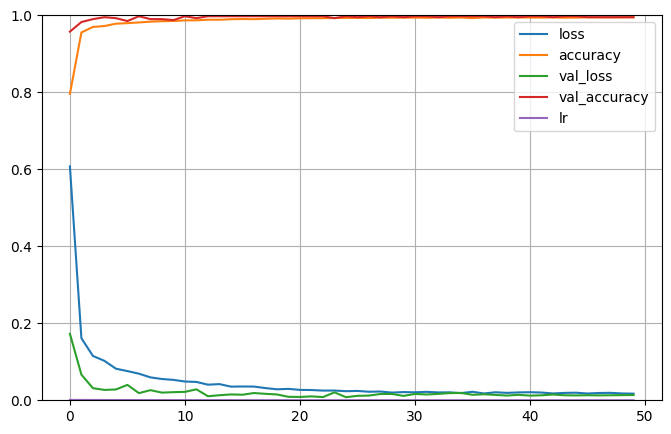

In [21]:
pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
results = model.predict(test)

# select index with the maximum probability
results = np.argmax(results,axis = 1)


my_submission = pd.DataFrame({'ImageId': range(1,28001),
                             'Label': results})
my_submission.to_csv('/content/drive/MyDrive/Digit_recognizer_Dataset/sample_submission.csv', index=False)

875/875 [==============================] - 31s 35ms/step
